In [525]:
import os.path
import statsmodels.stats.multitest as smt
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st

## 1 task - unit tables

Create dictionary (extension - function)

In [212]:
dict_extension = {".csv" : pd.read_csv, ".xls" : pd.read_excel, 
                  ".xlsx" : pd.read_excel, ".xlsm" : pd.read_excel,
                  ".xlsb" : pd.read_excel, ".odf" : pd.read_excel, 
                  ".ods" : pd.read_excel,  ".odt" : pd.read_excel,
                  ".json" : pd.read_json, ".html" : pd.read_html,
                  ".xml" : pd.read_xml, ".h5" : pd.read_hdf,
                  ".hdf" : pd.read_hdf}

Function for concetenation dataset

In [392]:
def unit_pd(*args):
    extension = os.path.splitext(args[0])[1]                       # determine extension
    read_df = map(dict_extension.get(extension), args)             # find acceptable function and use for every dataset
    df_together = pd.concat(read_df, ignore_index=True)            # concate every dataset
    return df_together

In [214]:
olimpic_games = unit_pd('athlete_events00.csv', 'athlete_events01.csv', 'athlete_events02.csv', 'athlete_events03.csv', \
                        'athlete_events04.csv', 'athlete_events05.csv', 'athlete_events06.csv', 'athlete_events07.csv', \
                        'athlete_events08.csv', 'athlete_events09.csv', 'athlete_events10.csv', 'athlete_events11.csv')

Observe result, concentrationg on entries number  

In [215]:
olimpic_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271115 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 31.0+ MB


## 2 task - find and correct mistakes

Check different mistakes in data

1. Check types of column

In [216]:
olimpic_games.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

> all attributes have acceptable type

2. Check NA content

In [217]:
olimpic_games.isna().sum()

ID             0
Name           1
Sex            2
Age         9476
Height     60172
Weight     62876
Team           3
NOC            4
Games          5
Year           7
Season         7
City           7
Sport          7
Event          8
Medal     231333
dtype: int64

> We have a lot of NaN in Medal, Height, Weight, Age so we aren't able to drop all NaN

3. Check misspel using unique evidence

In [218]:
for column in olimpic_games[:][1:]:
    print(olimpic_games[column].unique())

[     1      2      3 ... 135569 135570 135571]
['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'Andrzej ya' 'Piotr ya'
 'Tomasz Ireneusz ya']
['M' 'F' 'G' nan]
[ 24.  23.  34.  21.  25.  27.  31.  33.  18.  26.  22.  30.  32.  28.
  54.  20.  17.  43.  47.  29.  41.  45.  49.  53.  57.  nan  19.  38.
  35.  16.  37.  15.  42.  46.  40.  36.  14.  39.  48.  52.  44.  55.
  50.  71.  63.  51.  58.  13.  60.  75.  65.  56.  64.  68.  84.  12.
  72.  59.  61.  70.  74.  62.  67.  69.  73.  66.  11. 240.  76.  88.
  96.  80.  10.  81.  77.  97.]
[180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 340. 212. 131. 136

4. Select Age of participants

The threshold - 73 - is an age of the oldest participants (according to Internet). The lower threshold is really 10 

In [219]:
olimpic_games = olimpic_games_new.loc[olimpic_games['Age'] < 73]

5. Investigate a very unusual mistake

In [220]:
olimpic_games.loc[olimpic_games['Sex'] == 'G']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


> This man so replace values

6. Replace all strange record

In [221]:
olimpic_games.Sex = olimpic_games.Sex.replace({'G', 'M'}) 
olimpic_games.Games = olimpic_games.Games.replace({'2000 Su' : '2000 Summer',
                                             '2004 Summe' : '2004 Summer'}) 
olimpic_games.City = olimpic_games.City.replace({'Moskva', 'Moscow'}) 
olimpic_games.Sport = olimpic_games.Sport.replace({'Footba', 'Football'}) 
olimpic_games.NOC = olimpic_games.NOC.replace({'JP', 'JPN'}) 

C:\Users\ornfi\AppData\Local\Temp\ipykernel_9012\2731717907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olimpic_games.Sex = olimpic_games.Sex.replace({'G', 'M'})
C:\Users\ornfi\AppData\Local\Temp\ipykernel_9012\2731717907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olimpic_games.Games = olimpic_games.Games.replace({'2000 Su' : '2000 Summer',
C:\Users\ornfi\AppData\Local\Temp\ipykernel_9012\2731717907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Finally, check correction

In [232]:
for column in olimpic_games:
    print(olimpic_games[column].unique())

[     1      2      3 ... 135569 135570 135571]
['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'Andrzej ya' 'Piotr ya'
 'Tomasz Ireneusz ya']
['M' 'F']
[24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. 19. 38. 35. 16. 37. 15. 42. 46. 40. 36. 14.
 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 65. 56. 64. 68. 12. 72.
 59. 61. 70. 62. 67. 69. 66. 11. 10.]
[180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 179.
 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153. 152.
 193. 197. 157. 207. 147. 156. 162. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 149. 199. 211. 215. 139. 206.
 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216. 141.
 132. 340. 212. 136. 137. 138. 220. 130. 219. 133. 128. 226.]
[ 80.          60.                  nan  82.          75.
  72.          96.          76.5         7

Drop Na rows for column where Na attendance is very strange

In [222]:
olimpic_games = olimpic_games.dropna(subset=['Name', 'Sex', 'NOC', 'Games', 'Sport', 'Year'])

In [223]:
olimpic_games

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271111,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271113,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## 3 task - min Age in 1992

In [391]:
olimpic_games.query('Year == 1992').groupby('Sex').min('Age')

,ID,Age,Height,Weight,Year
Sex,,,,,
F,5,12.0,136.0,30.0,1992.0
M,1,11.0,140.0,45.0,1992.0


> The youngest man was 11 in 1992 Games

> The youngest woman was 12 in 1992 Games

## 4 task - mean and std for every Sex

In [230]:
olimpic_games.groupby('Sex').aggregate({'Height' : ['mean', 'std']})

Height          
           mean       std
Sex                      
F    167.846441  8.798572
M    178.894882  9.357840

## 5 task - Height of tennis player

In [235]:
olimpic_games.query("Sport == 'Tennis' & Sex == 'F' & Year == 2000").aggregate({'Height' : ['mean', 'std']})

,Height
mean,171.792000
std,6.458673


## 6 task - max Weight in 2006

In [266]:
max_weight_06 = olimpic_games[olimpic_games['Year'] == 2006].Weight.max()

In [269]:
olimpic_games.query("Year == 2006 & Weight == @max_weight_06").Sport

8102    Skeleton
Name: Sport, dtype: object

> Skeleton

## 7 task - female medals in 1980-2010

In [285]:
olimpic_games.query("Medal == 'Gold' & 1980 <= Year <= 2010 & Sex == 'F'").ID.count()

2249

## 8 task - John Aalberg and participation in the Olimpic Games

In [294]:
olimpic_games.query("Name == 'John Aalberg'").groupby('Year')['ID'].count()

Year
1992.0    4
1994.0    4
Name: ID, dtype: int64

John Aalberg participated in 2 Olympic Games in 4 competitions in each

## 9 task - range of Age

In [301]:
interval_range = pd.interval_range(start=15,                     # create ranges
                                   freq=10,
                                   end=55,
                                   closed='left')

olimpic_games.query("Year == 2008")['Age'].value_counts(bins=interval_range)  

[25, 35)    6367
[15, 25)    6294
[35, 45)     790
[45, 55)     116
Name: Age, dtype: int64

## 10 task - how many sport was introduced

In [309]:
olimpic_games.query("Year == 2002")['Sport'].nunique() - olimpic_games.query("Year == 1994")['Sport'].nunique()

3

The number of sports changed by 3 at the 2002 Olympics compared to the 1994 Olympic Games

## 11 task - top 3 medals

In [362]:
count_table = pd.pivot_table(olimpic_games, index=["NOC"], 
                              columns = ['Medal', "Season"],
                              aggfunc='size')

for column in count_table:
    print(count_table[column].nlargest(3))

NOC
USA    1185.0
GER     644.0
URS     596.0
Name: (Bronze, Summer), dtype: float64
NOC
FIN    215.0
SWE    177.0
USA    161.0
Name: (Bronze, Winter), dtype: float64
NOC
USA    2461.0
URS     832.0
GBR     616.0
Name: (Gold, Summer), dtype: float64
NOC
CAN    305.0
URS    250.0
USA    166.0
Name: (Gold, Winter), dtype: float64
NOC
USA    1311.0
GBR     673.0
URS     635.0
Name: (Silver, Summer), dtype: float64
NOC
USA    308.0
CAN    199.0
NOR    165.0
Name: (Silver, Winter), dtype: float64


## 12 task - standardization

In [386]:
from sklearn import preprocessing

Height_z_scores = preprocessing.scale(olimpic_games.Height.dropna())

In [393]:
Height_z_scores

array([ 0.44133781, -0.50823622,  0.91612483, ...,  0.0615082 ,
        0.91612483,  0.91612483])

## 13 task - standardization by min-max

In [389]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(olimpic_games[['Height']].dropna())
Height_min_max_scaled = scaler.transform(olimpic_games[['Height']].dropna())

In [390]:
Height_min_max_scaled

array([[0.24882629],
       [0.20187793],
       [0.27230047],
       ...,
       [0.23004695],
       [0.27230047],
       [0.27230047]])

## 14 task - differances betweem man and woman

Select only Winter Olimpic Games

In [395]:
winter_olimpic_games = olimpic_games.query("Season == 'Winter'")

Test group on normality by Shapiro-Wilk Test

In [420]:
name_of_column = ['Age', 'Height', 'Weight']

for column in name_of_column:
    print(column, st.shapiro(winter_olimpic_games[column].dropna()))

Age ShapiroResult(statistic=0.968507707118988, pvalue=0.0)
Height ShapiroResult(statistic=0.9935776591300964, pvalue=1.889954556441327e-37)
Weight ShapiroResult(statistic=0.9880865216255188, pvalue=0.0)


C:\Users\ornfi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> All of these groups have non-normal distribution

See on histogramm

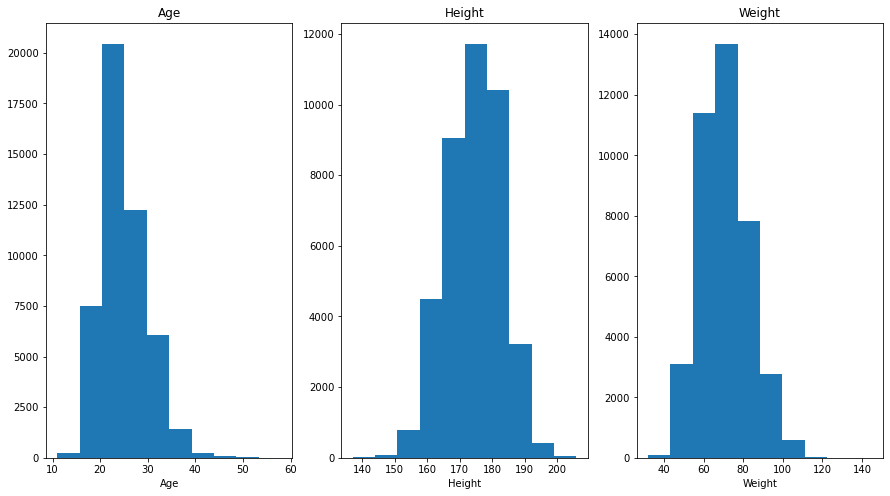

In [423]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 8))

for i in range(3):
        ## Store column name in variable
        axes[i].hist(winter_olimpic_games[name_of_column[i]])
        axes[i].set_xlabel(name_of_column[i])
        axes[i].set_title(name_of_column[i])

> Really abnormal distribution, especially Age and Weight

In this case we will use Mann–Whitney U test 

In [429]:
for column in name_of_column:
    print(column, st.mannwhitneyu(winter_olimpic_games.query('Sex == "F"')[column].dropna(), 
                                  winter_olimpic_games.query('Sex == "M"')[column].dropna()))

Age MannwhitneyuResult(statistic=206040116.0, pvalue=4.030780517903447e-214)
Height MannwhitneyuResult(statistic=31677097.0, pvalue=0.0)
Weight MannwhitneyuResult(statistic=29506891.0, pvalue=0.0)


> For all cases we reject H0 - the groups is different

But we have to take into account multiple comparisons problem

In [435]:
for column in name_of_column:
    mw_pvalue = st.mannwhitneyu(winter_olimpic_games.query('Sex == "F"')[column].dropna(), 
                                  winter_olimpic_games.query('Sex == "M"')[column].dropna()).pvalue
    bonf_adj_p_values = smt.multipletests(mw_pvalue, method="holm")[1]
    print(column, mw_pvalue, *bonf_adj_p_values, *bonf_adj_p_values < 0.05)

Age 4.030780517903447e-214 4.030780517903447e-214 True
Height 0.0 0.0 True
Weight 0.0 0.0 True


> Similar result

Create boxplot for visualisation

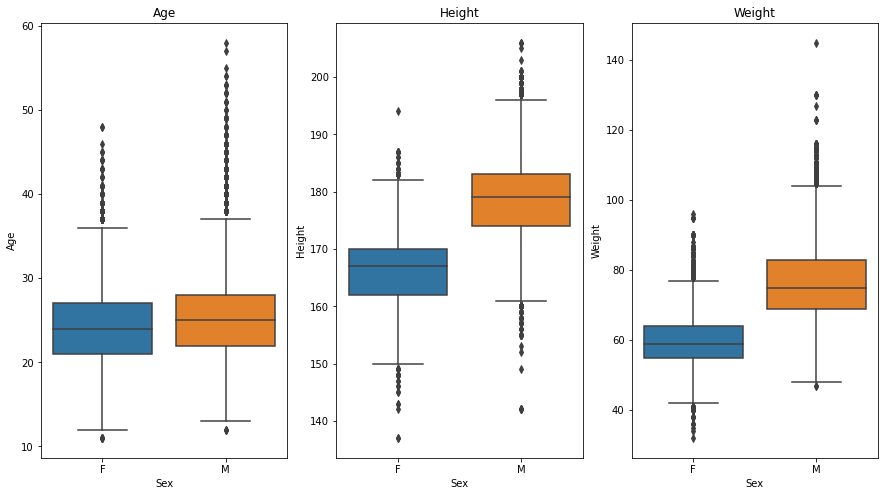

In [441]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 8))

for i in range(3):
        ## Store column name in variable
        sns.boxplot(data=winter_olimpic_games, x="Sex", y=name_of_column[i], ax = axes[i])
        axes[i].set_xlabel('Sex')
        axes[i].set_title(name_of_column[i])

> Age isn't very clear. So make errorbar plot

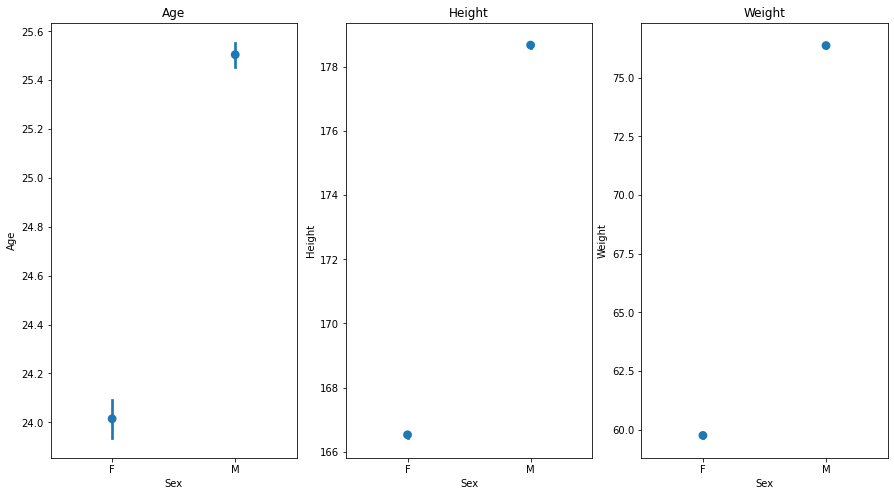

In [465]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 8))

for i in range(3):
        ## Store column name in variable
        sns.pointplot(data=winter_olimpic_games, x="Sex", y=name_of_column[i], errorbar='se', join = False, ax = axes[i])
        axes[i].set_title(name_of_column[i])

> Much better

## 15 task - Team - Medal correlation

Select only Team and Medal

In [475]:
olimpic_games_team_med = olimpic_games[['Team', 'Medal']]

In [476]:
olimpic_games_team_med

,Team,Medal
0,China,NaN
1,China,NaN
2,Denmark,NaN
3,Denmark/Sweden,Gold
4,Netherlands,NaN
...,...,...
271110,Poland-1,NaN
271111,Poland,NaN
271112,Poland,NaN
271113,Poland,NaN


To commence, I estimate correlation between these variable

In [526]:
factor_df = olimpic_games_team_med.apply(lambda x: x.factorize()[0])
factor_df.corr()

,Team,Medal
Team,1.000000,-0.013655
Medal,-0.013655,1.000000


> Very strange so start to use another approach

Try to collect all data in another view

In [517]:
olimpic_games_team_med_f = pd.crosstab(olimpic_games_team_med.Team, olimpic_games_team_med.Medal)
olimpic_games_team_med_f

Medal,Bronze,Gold,Silver
Team,,,
A North American Team,3,0,0
Afghanistan,2,0,0
Algeria,8,5,4
Ali-Baba II,5,0,0
Amateur Athletic Association,0,5,0
...,...,...,...
Winnipeg Shamrocks-1,0,12,0
Yugoslavia,92,130,167
Zambia,0,0,1


Let's see what will happen if we will use ANOVA

In [520]:
F, p = st.f_oneway(olimpic_games_team_med_f.Gold, olimpic_games_team_med_f.Silver, olimpic_games_team_med_f.Bronze)

print(F, p)

0.006059640994163467 0.993958706842261


> But ANOVA uses for numerical variable between categories so try use chi-square for these categories

In [521]:
chi2_stat, p, dof, expected = st.chi2_contingency(olimpic_games_team_med_f)

In [528]:
chi2_stat, p, dof
print(f"chi-square: {chi2_stat:.2f}")
print(f"p-value: {p:.2f}")
print(f"degrees of freedom: {dof}")

chi-square: 4701.41
p-value: 0.00
degrees of freedom: 964


> According to chi-square we can observe signivicant dependance between these categories and it seems to logical because usually particular team win, rather than random